# Prepare data

In [1]:
import shap
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [2]:
# Load data
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
num_features = X.shape[1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

# Train model

In [3]:
# Train model
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[683]	valid_0's binary_logloss: 0.277144


# Generate explanations

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from rexplain import removal, behavior, summary

In [5]:
# Make model callable with numpy inputs
model_lam = lambda x: model.predict(x)

# Model extension
marginal_extension = removal.MarginalExtension(X_test.values[:512], model_lam)

# Cooperative game
game = behavior.PredictionGame(marginal_extension, X.iloc[0, :].values)

CPU times: user 414 ms, sys: 0 ns, total: 414 ms
Wall time: 20.8 ms


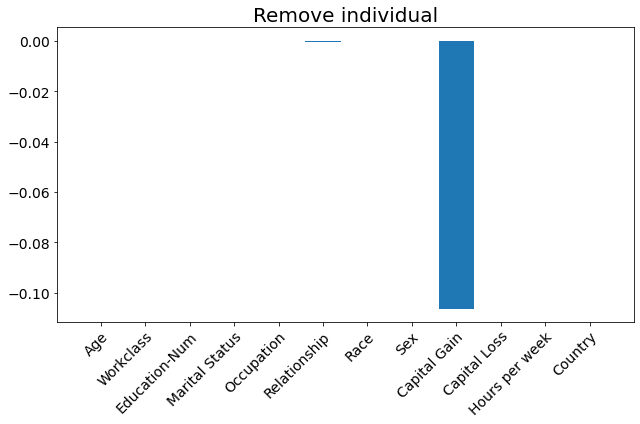

In [6]:
# Summary technique
%time attr = summary.RemoveIndividual(game)

plt.figure(figsize=(9, 6))
plt.bar(np.arange(len(attr)), attr)
plt.xticks(np.arange(len(attr)), X.columns,
           rotation=45, rotation_mode='anchor',
           ha='right', fontsize=14)
plt.tick_params(labelsize=14)
plt.title('Remove individual', fontsize=20)
plt.tight_layout()
plt.show()

CPU times: user 516 ms, sys: 0 ns, total: 516 ms
Wall time: 24.2 ms


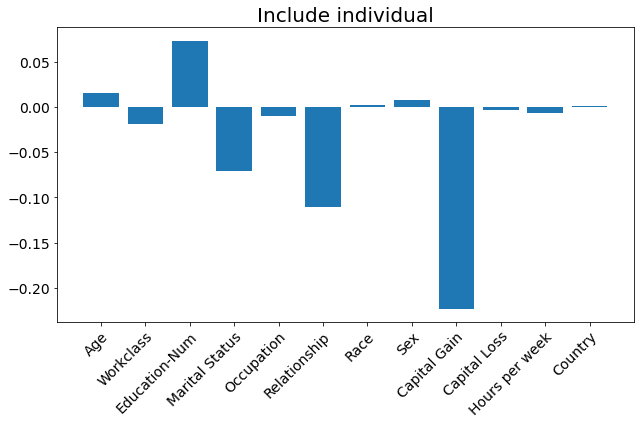

In [7]:
# Summary technique
%time attr = summary.IncludeIndividual(game)

plt.figure(figsize=(9, 6))
plt.bar(np.arange(len(attr)), attr)
plt.xticks(np.arange(len(attr)), X.columns,
           rotation=45, rotation_mode='anchor',
           ha='right', fontsize=14)
plt.tick_params(labelsize=14)
plt.title('Include individual', fontsize=20)
plt.tight_layout()
plt.show()

CPU times: user 2min 11s, sys: 267 ms, total: 2min 12s
Wall time: 5.99 s


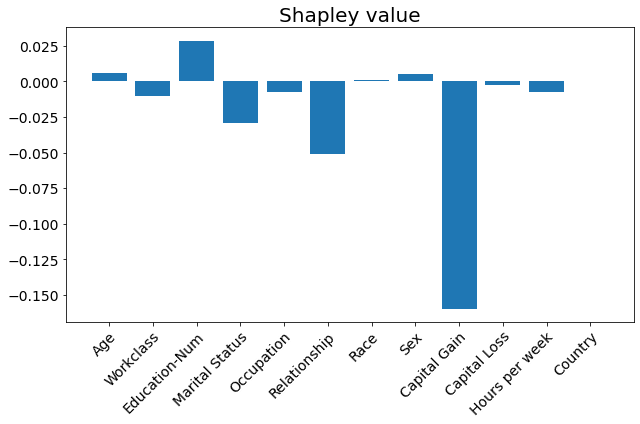

In [8]:
# Summary technique
%time attr = summary.ShapleyValue(game)

plt.figure(figsize=(9, 6))
plt.bar(np.arange(len(attr)), attr)
plt.xticks(np.arange(len(attr)), X.columns,
           rotation=45, rotation_mode='anchor',
           ha='right', fontsize=14)
plt.tick_params(labelsize=14)
plt.title('Shapley value', fontsize=20)
plt.tight_layout()
plt.show()